In [6]:
import pandas as pd
import numpy as np


In [15]:
# step2 : loading dataset
df=pd.read_csv("city_day.csv")
# displaying the information
print(df.info(),"\n\n")
# displaying the descriptive statistics
print(df.describe,"\n\n")
# checking the missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None 


<bound method NDFrame.describe of                 City        Date  PM2.5   PM10     NO    N

In [24]:
import seaborn as sns


<Axes: xlabel='AQI', ylabel='Count'>

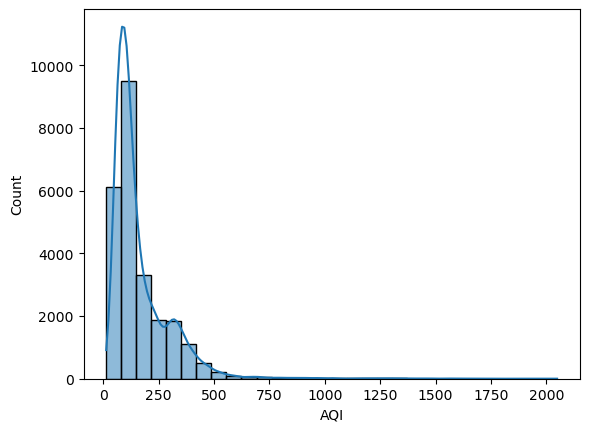

In [34]:
sns.histplot(df['AQI'].dropna(),bins=30,kde=True)

In [38]:
# step2 : data preprocessing
from sklearn.impute import SimpleImputer

In [56]:
# selecting the columns 
features=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
target='AQI'

In [58]:
df=df.dropna(subset=[target])

In [62]:
# handling missing values
imputer= SimpleImputer(strategy='mean')
df[features]=imputer.fit_transform(df[features])

In [66]:
# splitting the dataset into training testing
x=df[features]
y=df[target]

In [68]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
# normalise or standarise the feature
# sklearn preprocessing ,standardscaler
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

C:\Users\varun\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [84]:
# step4: train models
# train decision tree
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [114]:
# predict AQI
y_pred_dt=dt.predict(x_test)

In [116]:
# support vector module
from sklearn.svm import SVR

In [119]:
svr=SVR(kernel='rbf')
# rbf : radical basis function
svr.fit(x_train,y_train)

SVR()

In [120]:
# predict AQI
y_pred_svm=svr.predict(x_test)

In [125]:
from sklearn.linear_model import LinearRegression

# train linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
# predict AQI
y_pred_lr=lr.predict(x_test)

In [129]:
# step 5 Evaluate model performance
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [139]:
def evaluate_model(y_testt,y_pred,model):
    print("model Name:",model)
    print("mean absolute error:" ,mean_absolute_error(y_test,y_pred))
    print("mean squared error:",mean_squared_error(y_test,y_pred))
    print("R-squared score:",r2_score(y_test,y_pred))


In [137]:
mean_absolute_error(y_test,y_pred_dt)

425.0448692152917

In [141]:
evaluate_model(y_test,y_pred_dt,"Decision Tree")
evaluate_model(y_test,y_pred_svm,"Support Vector machine")
evaluate_model(y_test,y_pred_lr,"Linear Regression")

model Name: Decision Tree
mean absolute error: 425.0448692152917
mean squared error: 197761.16036217305
R-squared score: -9.800116422648344
model Name: Support Vector machine
mean absolute error: 159.09820186009318
mean squared error: 32572.569342299103
R-squared score: -0.7788505105722721
model Name: Linear Regression
mean absolute error: 7929.162392879153
mean squared error: 95167304.15169266
R-squared score: -5196.269082490996
